## Implementation of reverse-policy Q-learning using OpenAI FrozenLake as Gridworld template ##

### Sameera Lanka ###
### North Carolina State University ###

### This implementation calculates the forward policy


In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt
%matplotlib inline

#Create a new register enntry with FrozenLake environment to create
#with is_slippery=0 for deterministic actions 
register(
    id='FrozenLakeNew-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=200,
    reward_threshold=0.99, # optimum = 1
)

env = gym.make('FrozenLakeNew-v0')
reward = list()

In [2]:
class Qlearn:
    """Define Qlearning agent"""
    def __init__(self, env):
        self.action_space = env.action_space
        self.action_dict = dict([(0, 'Left'),(1,'Down'),(2,'Right'), (3,'Up')])
        self.state_space = env.observation_space
        self.q_table = np.zeros([self.state_space.n, self.action_space.n])
        
        self.discount = 0.9 #discount factor
        self.step = 0.01 #step size
        self.eps = 0.4 #initial epsilon
        
    def policy_eval(self):
        state_t = env.reset()
    
        for num in range(1000): #num of episodes = 1000
       
            state_t = env.reset()
            action = self.policy_iter(state_t)
            done = False
            episode_reward = 0
                        
            while not done:
                
                state_t1, reward_t1, done, info = env.step(action)
                episode_reward += reward_t1
                
                if done:
                    target = reward_t1
                    self.q_table[state_t, action] += self.step*(target - self.q_table[state_t, action])
                    
                    break
                
                else:
                    target = reward_t1 + self.discount*(np.amax(self.q_table[state_t1,:]))
                    self.q_table[state_t, action] += self.step*(target - self.q_table[state_t, action])
                    episode_reward += reward_t1
                    
                    state_t = state_t1
                    action = self.policy_iter(state_t)
                    
            self.eps *= 0.99 #exponential decay of epsilon per episode
            reward.append(episode_reward)

        
    def policy_iter(self, state):
 
        if np.random.random() > self.eps:
            #Random tie-breaking between max values
            q_max = np.amax(self.q_table[state,:])
            act_max = np.nonzero((self.q_table[state,:] == q_max))[0]
            action = np.random.choice(act_max)
           
        else:
            #Select random action
            action = self.action_space.sample()
        
        return action
    
    def final_policy(self):
        
        state_t = env.reset()
        env.render()
        done = False
        print "The final forward policy is"
        while not done:
            action = self.policy_iter(state_t)
            state_t1, _, done, _ = env.step(action)
            env.render()
            print "{:d} -> {:d}, {}".format(state_t, state_t1, self.action_dict[action])
            state_t = state_t1
            action = self.policy_iter(state_t)

In [3]:
def main():
    
    tabq = Qlearn(env)
    tabq.policy_eval()
    tabq.final_policy()
   
    plt.xlabel('Episode number')
    plt.ylabel('Reward')
    plt.plot(reward)



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
The final forward policy is
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
0 -> 1, Right
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
1 -> 2, Right
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
2 -> 3, Right
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
3 -> 11, Down
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
11 -> 12, Right
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
12 -> 13, Right
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
13 -> 14, Right
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
14 -> 22, Down
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
22 -> 23, Right
  (Down)
SFFFFFFF
FFFFFFFF
F

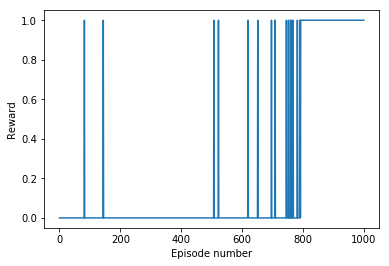

In [4]:
if __name__=="__main__":
    main()